# Exploratory Data Analysis
---

Questions to explore:
- 1.    Delays
- 1.1   Is Delays a normal Distribution?
- 1.2   What is the distribution of Delays by Carrier and Aircraft
1.2 What is the mean of Delays by year?
1.3 Whats the average proportion of Flight Delays
1.4 What is the is the average propotion of Depature Delays
1.5 What is the average propotion of Arrival (Airtime)Delays

In [5]:
from modules.data_Analysis import *

In [6]:
from lets_plot import *
LetsPlot.setup_html()

In [7]:
data = '/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Mid_term_project/Datasets/merged.csv'

In [8]:
df = pd.read_csv(data)

In [9]:
df.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 HA                 HA          HA   
1  2018-01-08                 HA                 HA          HA   
2  2018-01-11                 HA                 HA          HA   
3  2018-01-13                 HA                 HA          HA   
4  2018-01-22                 HA                 HA          HA   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                  47                HA   N390HA                 47   
1                  47                HA   N378HA                 47   
2                   2                HA   N393HA                  2   
3                   4                HA   N380HA                  4   
4                   9                HA   N379HA                  9   

   origin_airport_id origin_x  ... dest_y  dest_country aircraft_group  \
0              13796      OAK  ...    HNL            US              6   
1              13796      OAK  ...    HNL            US              6   
2              12173      HNL  ...    LAX            US              6   
3              12173      HNL  ...    LAX            US              6   
4              12892      LAX  ...    HNL            US              6   

  aircraft_type  aircraft_config  distance_group  class  data_source  \
0           608                1               5      F           DU   
1           608                1               5      F           DU   
2           626                1               6      F           DU   
3           626                1               6      F           DU   
4           626                1               6      F           DU   

   total_gallons  total_cost  
0       22432193    44118790  
1       22432193    44118790  
2       22432193    44118790  
3       22432193    44118790  
4       22432193    44118790  

[5 rows x 69 columns]

In [10]:
# Add column for delay as carrier_delay	weather_delay	nas_delay	security_delay	late_aircraft_delay
#df['delay'] = df['carrier_delay'] + df['weather_delay'] + df['nas_delay'] + df['security_delay'] + df['late_aircraft_delay']

In [11]:
# add column for day, month, year
df['year'] = df['fl_date'].str[0:4]
df['month'] = df['fl_date'].str[5:7]
df['day'] = df['fl_date'].str[8:10]


In [12]:
# add column for day of week
df['day_of_week'] = pd.to_datetime(df['fl_date']).dt.day_name()


In [13]:
df.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 HA                 HA          HA   
1  2018-01-08                 HA                 HA          HA   
2  2018-01-11                 HA                 HA          HA   
3  2018-01-13                 HA                 HA          HA   
4  2018-01-22                 HA                 HA          HA   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                  47                HA   N390HA                 47   
1                  47                HA   N378HA                 47   
2                   2                HA   N393HA                  2   
3                   4                HA   N380HA                  4   
4                   9                HA   N379HA                  9   

   origin_airport_id origin_x  ... dest_country  aircraft_group aircraft_type  \
0              13796      OAK  ...           US               6           608   
1              13796      OAK  ...           US               6           608   
2              12173      HNL  ...           US               6           626   
3              12173      HNL  ...           US               6           626   
4              12892      LAX  ...           US               6           626   

  aircraft_config  distance_group  class  data_source  total_gallons  \
0               1               5      F           DU       22432193   
1               1               5      F           DU       22432193   
2               1               6      F           DU       22432193   
3               1               6      F           DU       22432193   
4               1               6      F           DU       22432193   

   total_cost  day_of_week  
0    44118790       Monday  
1    44118790       Monday  
2    44118790     Thursday  
3    44118790     Saturday  
4    44118790       Monday  

[5 rows x 70 columns]

## > Delays
### > 1.1   Is Delays a normal Distribution?
---

In [14]:
# count number of flights delayed by day_of_week, sort by delay
df.groupby('day_of_week')['Total_delay'].count().sort_values(ascending=False)

day_of_week
Tuesday      1953
Monday       1931
Wednesday    1628
Friday       1437
Sunday       1423
Thursday     1308
Saturday     1191
Name: Total_delay, dtype: int64

In [15]:
# scatter plot of total  delay by day of month
ggplot(df, aes(x='day', y='Total_delay')) + geom_point()


In [16]:
# drop row where total delay is > -200
df = df[df['Total_delay'] > -200]

In [17]:
ggplot(df, aes(x='day', y='Total_delay')) + geom_point()

In [18]:
import matplotlib.pyplot as plt

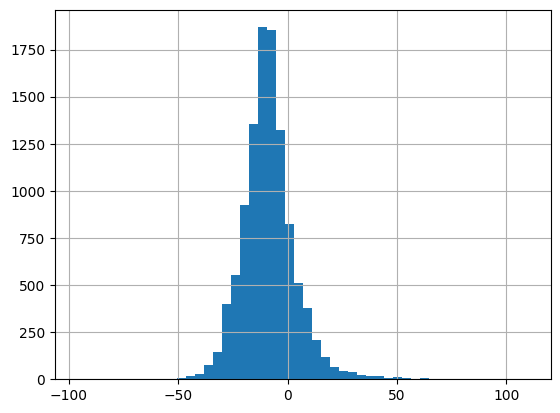

In [19]:
# find outliers in Total_delay
df['Total_delay'].describe()
df['Total_delay'].hist(bins=50)
plt.show()


`From the histogram most flights seem to leave on time or early`

### Mean and standard deviation

In [20]:
# mean and standard deviation of Total_delay
mean = df['Total_delay'].mean()
std = df['Total_delay'].std()
print('mean: ', mean)
print('std: ', std)

mean:  -8.50101195952162
std:  12.85837091300566


### Quantile-Quantile Plot

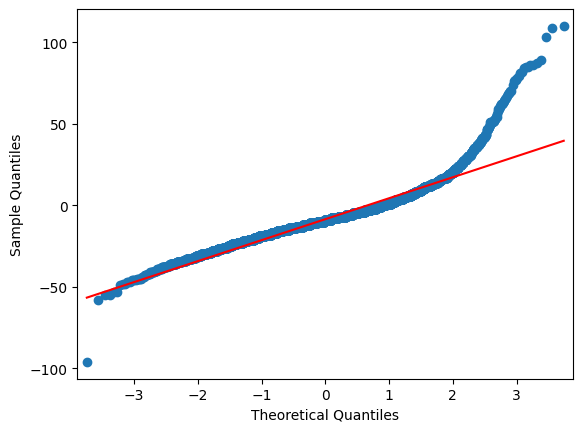

In [21]:
from statsmodels.graphics.gofplots import qqplot
# QQ plot of Total_delay
qqplot(df['Total_delay'], line='s')
plt.show()

` There is one deviation at the bottom and more at the top`

### Shapiro - Wilk Test

In [22]:
# test the hypothesis that Total_delay is normally distributed
# H0: Total_delay is normally distributed
# H1: Total_delay is not normally distributed

# Shapiro-Wilk Test
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt

def test_shapiro_wilk():
    stat, p = shapiro(df['Total_delay'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
        print('p=%.3f, alpha=%.3f' % (p, alpha))
        # plot
        plt.hist(df['Total_delay'])
        plt.show()
        plt.hist(df['Total_delay'], bins=100)
        plt.show()
        


Statistics=0.911, p=0.000
Sample does not look Gaussian (reject H0)
p=0.000, alpha=0.050


/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


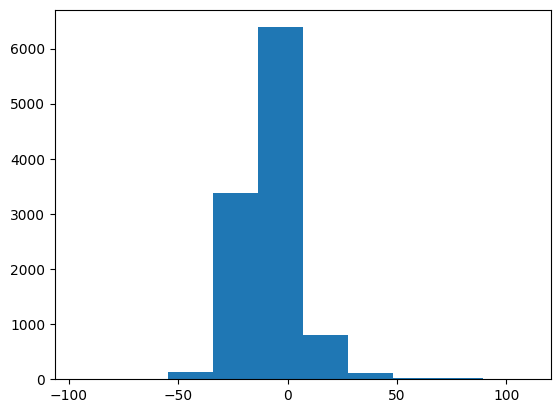

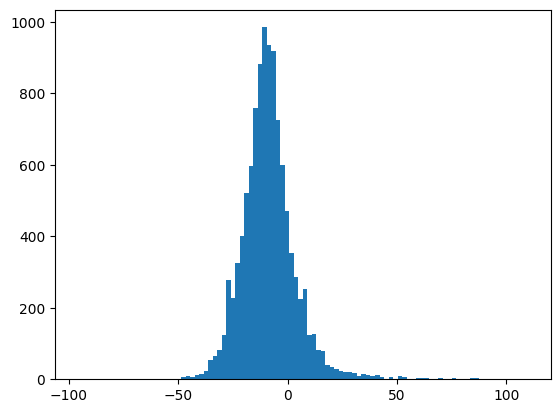

In [23]:
test_shapiro_wilk()

In [24]:
# ggplot of shapiro-wilk test
quantiles = {'..quantile..': [0.25, 0.5, 0.75]}
ggplot(df, aes(x='Total_delay'))\
    + geom_density(color = 'yellow',size = 1, quantiles = [0.25, 0.5, 0.75]) + \
    theme_classic() + \
    flavor_high_contrast_dark() + \
    geom_vline(xintercept=mean, color='red', size = 0.5)

- ` Statistic = 0.911. A quantity calculated by the test that can be interpreted in the context of the test via`
- ` P-value 0.000` 
- ` since P is less than 0.05, the test is considered to have failed. `
- `Distribution was not drawn from a normal distribution. `
- ` mean delay is not equal to 0. `


#### 2. Is average/median weekly delay different during the month?
#### If yes, which are days with the biggest delays and what could be the reason?

In [25]:
x = df.groupby('day_of_week')['Total_delay'].mean().sort_values(ascending=False).index.tolist()
y = df.groupby('day_of_week')['Total_delay'].mean().sort_values(ascending=False).values.tolist()
ggplot() + \
    geom_bar(aes(x='x', y='y', fill='x'), data={'x': x, 'y': y}, \
                stat='identity', show_legend=False) + \
    scale_fill_discrete()

> ` Here we see that all flights leave on time, by an average of about 7 minutes.`

### > flight delays by day of month

In [26]:
# flight delays by day of month
x = df.groupby('day')['Total_delay'].mean().index.tolist()
y = df.groupby('day')['Total_delay'].mean().values.tolist()
ggplot() + \
    geom_bar(aes(x='x', y='y', fill='x'), data={'x': x, 'y': y}, \
                stat='identity', show_legend=False) + \
    scale_fill_discrete()


` Most flights left on time. with an exception of the 17th.  Delays are evenly distributed throughout the month.`

### > Delays by carrier Analysis

> Total Delays by carrier, top 10

In [27]:
# top 10 most delayed carriers by mean total delay
x = df.groupby('carrier_name')['Total_delay'].mean().sort_values(ascending=False).index.tolist()[0:10]
y = df.groupby('carrier_name')['Total_delay'].mean().sort_values(ascending=False).values.tolist()[0:10]
ggplot() + \
    geom_bar(aes(x='x', y='y', fill='x'), data={'x': x, 'y': y}, \
                stat='identity', show_legend=False) + \
    scale_fill_discrete()

> `No delays`

## > Investigate arrival and departure delays

In [28]:
from copy import deepcopy

In [29]:
flights = deepcopy(df)

In [30]:
flights_summary = pd.DataFrame(flights.describe())
flights_summary[['dep_delay', 'arr_delay']]

dep_delay     arr_delay
count  10870.000000  10870.000000
mean      12.803128      4.286753
std       56.143254     58.151544
min      -72.000000   -176.000000
25%       -5.000000    -17.000000
50%       -2.000000     -9.000000
75%        7.000000      4.000000
max     1443.000000   1347.000000

`> `From reading, actual elapsed time is the total of air time, taxi in and out.

In [31]:
flights[['crs_elapsed_time', 'actual_elapsed_time', 'air_time']]

crs_elapsed_time  actual_elapsed_time  air_time
0                 350.0                314.0     298.0
1                 350.0                315.0     298.0
2                 315.0                312.0     286.0
3                 310.0                313.0     286.0
4                 375.0                384.0     354.0
...                 ...                  ...       ...
10866              81.0                 94.0      64.0
10867             233.0                209.0     182.0
10868             201.0                205.0     178.0
10869             130.0                109.0      94.0
10870              96.0                 70.0      55.0

[10870 rows x 3 columns]

Create new columns: 
`1)` Air time delay
`2)` Total departure delay 
`3)` flight time delay

`actual elapsed time is the total of air time, taxi in and out.`

In [32]:
flights['flight_time_delay'] = flights.actual_elapsed_time - flights.crs_elapsed_time
flights['air_dep_total'] = flights.flight_time_delay + flights.dep_delay

In [33]:
data_filter = ['dep_delay', 'arr_delay', 'air_dep_total', 'flight_time_delay']
flights[data_filter].sort_values(by='arr_delay').head(10)

dep_delay  arr_delay  air_dep_total  flight_time_delay
1958       -72.0     -176.0          -65.0                7.0
4556        -5.0      -63.0          -63.0              -58.0
10217       -6.0      -61.0          -61.0              -55.0
9305        -9.0      -56.0          -56.0              -47.0
8751        -3.0      -56.0          -56.0              -53.0
10220        0.0      -55.0          -55.0              -55.0
4398        -6.0      -54.0          -54.0              -48.0
4482       -12.0      -53.0          -53.0              -41.0
3178        -6.0      -52.0          -52.0              -46.0
4242        -5.0      -50.0          -50.0              -45.0

`>>>` `Elapsed time is the duration of the flight`\
`>>>` `Crs_elapsed time duration of flight at destination`\
> A measure of delay while in the flight, in seconds\
`>>>` **flight_time_delay:** actual_elapsed_time - crs_elapsed_time\


>
> 
`>>>` **arr_delay:** Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.\
`>>>` **dep_delay:** Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.\

> `air_dep_total` must equal `arr_delay` for this theory to be valid.\
> `>>>` **air_dep_total:** flight_time_delay + dep_delay\


`From above, the theory is valid`

In [34]:
# Quality check:
#check if delay time and arrival delay are the same
(flights.arr_delay == flights.air_dep_total).value_counts()

True     10864
False        6
dtype: int64

In [35]:
# Create function to see proportion of delay time from depature delays versus air time delays 
# Also shows if one or the other reduces delay time
def delay_proportions(df, flight_time=False):
    '''Returns the proportion of the delay accounted for by the departure delay and by the air time delay.
        Also returns the percentage adjustment if either air time or early departure compensates for the delay.
        Parameters:
            a (Pandas Data Frame) Flight data frame without additional column air_total_delay
            b (boolean) If True, will use data from previously created column 
        Returns:
            Four numpy one-dimensional arrays to use for new columns in dataframe
    '''
    size = np.shape(df)[0]
    size_range = range(size)
    
    
    departure = np.empty(size)
    airtime = np.empty(size)
    air_adjust = np.zeros(size)
    dep_adjust = np.zeros(size)
    
    for i in size_range:
        row = df.iloc[i]
        delay = row['arr_delay']
        dep_delay = row['dep_delay']
        air_delay = 0
        
        if flight_time == False:
            air_delay = row['actual_elapsed_time'] - row['crs_elapsed_time']
        else:
            air_delay = row['flight_time_delay']
       
        if delay is np.NAN:
            departure[i] = np.NAN
            airtime[i] = np.NAN
            air_adjust[i] = np.NAN
            dep_adjust[i] = np.NAN
        
        elif delay <= 0: # No delay case: for now, all zero proportions
            airtime[i] = 0
            departure[i] = 0
        else:
            
            if dep_delay > delay: # Case departure delay is 100% but air time compensates
                departure[i] = 1.0
                airtime[i] = 0
                air_adjust[i] = round(air_delay/dep_delay, 2)
            
            elif dep_delay == delay: # Case departure delay is exactly 100%
                departure[i] = 1.0
                airtime[i] = 0
            
            elif dep_delay < 0: # Case air time delay is 100% but early departure compensates
                departure[i] = 0
                airtime[i] = 1.0
                dep_adjust[i] = round(dep_delay/air_delay, 2)
            
            elif dep_delay == 0: # Case air time delay is exaclty 100%
                departure[i] = 0
                airtime[i] = 1.0
            
            else: # Case where departure is from both
                departure[i] = round(dep_delay/delay, 2) 
                airtime[i] = round(air_delay/delay, 2)
    
    return departure, airtime, air_adjust, dep_adjust

In [36]:
dep, air, air_ad, dep_ad = delay_proportions(flights, flight_time=True)
flights['dep_delay_prop'] = dep
flights['air_delay_prop'] = air
flights['air_adjust_prop'] = air_ad
flights['dep_adjust_prop'] = dep_ad

In [37]:
data_filter = ['dep_delay', 'flight_time_delay', 'arr_delay', 'dep_delay_prop', 'air_delay_prop',
       'air_adjust_prop', 'dep_adjust_prop']

In [38]:
# sort by depature delay proportion and the air time delay proportion to see if there is a relationship
# Is the pilot trying to make up for lost time in the air?
flights[data_filter].sort_values(by='air_delay_prop', ascending=False).head(10)

dep_delay  flight_time_delay  arr_delay  dep_delay_prop  \
10242       -7.0               22.0       15.0             0.0   
822         -1.0               10.0        9.0             0.0   
6336        -3.0                4.0        1.0             0.0   
832         -3.0                7.0        4.0             0.0   
6338        -3.0                5.0        2.0             0.0   
8390         0.0                1.0        1.0             0.0   
4504        -7.0                8.0        1.0             0.0   
8923        -9.0               10.0        1.0             0.0   
7719        -2.0                3.0        1.0             0.0   
7718        -2.0                3.0        1.0             0.0   

       air_delay_prop  air_adjust_prop  dep_adjust_prop  
10242             1.0              0.0            -0.32  
822               1.0              0.0            -0.10  
6336              1.0              0.0            -0.75  
832               1.0              0.0            -0.43  
6338              1.0              0.0            -0.60  
8390              1.0              0.0             0.00  
4504              1.0              0.0            -0.88  
8923              1.0              0.0            -0.90  
7719              1.0              0.0            -0.67  
7718              1.0              0.0            -0.67

`>>>` **dep_delay:** Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.\
> A measure of delay while in the flight, in seconds\
`>>>` **flight_time_delay:** actual_elapsed_time - crs_elapsed_time\

`>>>` **arr_delay:** Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.\

`>>>` **dep_adjust_prop** = dep_delay / flight_time_delay.  `Depature delay that can be adjusted during flighttime.`\
`>>>` **air_adjust_prop** = flight_time_delay / dep_delay. ` Propotion of flight time adjustment from depature.`\
`>>>`  **air_delay_prob** = flight_time_delay/arr_delay. ` Propotion of flight time delay on arrival.`\
`>>>` **dep_delay_prob** = dep_delay/arr_delay. `Propotion of depature delay on arrival.`\




In [39]:
# sort arrival delay ascending to see how often the plane makes up for lost time and why
flights[data_filter].sort_values(by=['arr_delay', 'flight_time_delay'], ascending = [False, False]).head(20)

# Most flights that leave late try to make up for lost time in the air
# Most flights that arrive late have a departure delay and an air time delay
# Most flights that arrive early have no departure delay and no air time delay

dep_delay  flight_time_delay  arr_delay  dep_delay_prop  \
5515      1443.0              -96.0     1347.0            1.00   
5139      1228.0               14.0     1242.0            0.99   
5537      1060.0               19.0     1079.0            0.98   
10664     1054.0              -22.0     1032.0            1.00   
152        994.0               -5.0      989.0            1.00   
10161      988.0              -18.0      970.0            1.00   
4781       827.0               -9.0      818.0            1.00   
4663       759.0               39.0      798.0            0.95   
10738      784.0              -14.0      770.0            1.00   
10525      718.0               38.0      756.0            0.95   
10347      759.0              -12.0      747.0            1.00   
7885       757.0              -20.0      737.0            1.00   
2179       650.0               -9.0      641.0            1.00   
10272      629.0              -33.0      596.0            1.00   
10362      507.0               63.0      570.0            0.89   
3606       524.0               35.0      559.0            0.94   
6873       566.0              -18.0      548.0            1.00   
8353       516.0                9.0      525.0            0.98   
10561      546.0              -38.0      508.0            1.00   
10813      490.0                6.0      496.0            0.99   

       air_delay_prop  air_adjust_prop  dep_adjust_prop  
5515             0.00            -0.07              0.0  
5139             0.01             0.00              0.0  
5537             0.02             0.00              0.0  
10664            0.00            -0.02              0.0  
152              0.00            -0.01              0.0  
10161            0.00            -0.02              0.0  
4781             0.00            -0.01              0.0  
4663             0.05             0.00              0.0  
10738            0.00            -0.02              0.0  
10525            0.05             0.00              0.0  
10347            0.00            -0.02              0.0  
7885             0.00            -0.03              0.0  
2179             0.00            -0.01              0.0  
10272            0.00            -0.05              0.0  
10362            0.11             0.00              0.0  
3606             0.06             0.00              0.0  
6873             0.00            -0.03              0.0  
8353             0.02             0.00              0.0  
10561            0.00            -0.07              0.0  
10813            0.01             0.00              0.0

In [40]:
# plot dep_delay vs flight_time_delay to see if there is a relationship
ggplot(flights, aes(x='dep_delay', y='flight_time_delay')) + \
    geom_point() + \
    theme_classic() + \
    flavor_high_contrast_dark() + \
    geom_smooth(method='lm')


` On very few occassions will the pilot fly faster when there was a depature delay` \
if plane is delayed at depature, its most likely that time lost is not compensated during the flight.`

In [41]:
#Create new df and explore more relationships
flights_df = flights[data_filter].sort_values(by=['dep_delay_prop','air_adjust_prop'], ascending=[False, True])

In [42]:
# total number of flights
total_flights = flights_df.shape[0]

# number of flights with delays (arr_delay > 0)
delayed_flights = flights_df[flights_df.arr_delay > 0].shape[0]

# number of flights with departure delays (dep_delay > 0)
dep_delayed_flights = flights_df[flights_df.dep_delay > 0].shape[0]

# number of flights with air time delays (flight_time_delay > 0)
air_delayed_flights = flights_df[flights_df.flight_time_delay > 0].shape[0]

In [43]:
print ('Proportion of flights with delays: ', round(delayed_flights/total_flights, 2))
print ('Proportion of flights with departure delays: ', round(dep_delayed_flights/total_flights, 2))
print ('Proportion of flights with air time delays: ', round(air_delayed_flights/total_flights, 2))

Proportion of flights with delays:  0.29
Proportion of flights with departure delays:  0.34
Proportion of flights with air time delays:  0.17


Proportion of flights with delays:  `0.29`\
Proportion of flights with departure delays:  `0.34`\
Proportion of flights with air time delays:  `0.17`

#### Conclusion:
Only `1/3` of all `flights are delayed`\
Out of all delays, `34%` are `due to depature delays.`\
Only `17%` of all delayed are `due to airtime delays`

---

### Top 10 bussiest airports

In [44]:
from copy import deepcopy
df = deepcopy(df)

In [45]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin_x',
       'origin_city_name', 'dest_airport_id', 'dest_x', 'dest_city_name',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'Total_delay', 'day', 'month', 'year',
       'departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'ramp_to_ramp', 'unique_carrier',
       'airline_id', 'region', 'carrier', 'carrier_name', 'carrier_group',
       'carrier_group_new', 'origin_y', 'origin_country', 'dest_y',
  

In [46]:
# return airports and total number of passengers
df.groupby('origin_x')['passengers'].sum().sort_values(ascending=False).head(10)

origin_x
ATL    179861
MCO     54320
MSP     51334
ORD     51176
FLL     38875
MIA     37309
DFW     37163
DTW     36621
LAX     33184
IAH     31807
Name: passengers, dtype: int64

In [47]:
# return airports and total number of flights
df.groupby('origin_x')['flights'].sum().sort_values(ascending=False).head(10)

origin_x
ATL    1602
ORD     589
MSP     456
MCO     413
DTW     402
DFW     351
CLT     343
FLL     324
IAH     287
SLC     281
Name: flights, dtype: int64

In [48]:
# plot number of flights by airport sorted by number of flights descending
ggplot (df, aes(x='origin_x')) + \
    geom_bar() + \
    ggtitle('Number of Flights by Airport') + \
    xlab('Airport') + \
    ylab('Number of Flights')


In [49]:
# plot number of passengers by airport sorted by number of flights descending
ggplot (df, aes(x='origin_x', weight='passengers')) + \
    geom_bar() + \
    ggtitle('Number of Passengers by Airport') + \
    xlab('Airport') + \
    ylab('Number of Passengers')

In [50]:
# Top 10 airports by number of flights
top10 = df.groupby('origin_x')['flights'].sum().sort_values(ascending=False).head(10).index
# bar plot of top 10 airports by number of flights sorted by number of flights descending
# plot top10
ggplot (df[df.origin_x.isin(top10)], aes(x='origin_x')) + \
    geom_bar() + \
    theme_classic() + \
    flavor_high_contrast_dark() + \
    ggtitle('Number of Flights by Airport') + \
    xlab('Airport') + \
    ylab('Number of Flights')



In [51]:
# number of total passengers by top 10 airports
x = df[df.origin_x.isin(top10)].groupby('origin_x')['passengers'].sum().sort_values(ascending=False)
# plot x
ggplot (x.reset_index(), aes(x='origin_x', weight='passengers')) + \
    geom_bar() + \
    theme_classic() + \
    flavor_high_contrast_dark() + \
    ggtitle('Number of Passengers by Airport') + \
    xlab('Airport') + \
    ylab('Number of Passengers')


---

### Average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [52]:
# Average weekly delay by carrier
df.groupby('carrier_name')['Total_delay'].mean().sort_values(ascending=False)


carrier_name
Mesa Airlines Inc.                         -2.283784
Envoy Air                                  -3.565421
JetBlue Airways                            -3.712500
PSA Airlines Inc.                          -4.322314
Alaska Airlines Inc.                       -4.437229
Spirit Air Lines                           -5.175325
SkyWest Airlines Inc.                      -6.073271
Allegiant Air                              -6.116279
ExpressJet Airlines Inc.                   -6.779141
Frontier Airlines Inc.                     -7.163462
Republic Airline                           -7.602041
Southwest Airlines Co.                     -7.671642
Endeavor Air Inc.                          -8.448413
American Airlines Inc.                     -8.521277
United Air Lines Inc.                      -8.534495
Delta Air Lines Inc.                      -10.223104
GoJet Airlines LLC d/b/a United Express   -10.890000
Hawaiian Airlines Inc.                    -12.400000
Compass Airlines                 

In [53]:
# total distance by carrier
df.groupby('carrier_name')['distance'].sum().sort_values(ascending=False)

carrier_name
Delta Air Lines Inc.                       3267856
United Air Lines Inc.                      1272214
American Airlines Inc.                      824602
SkyWest Airlines Inc.                       378762
Southwest Airlines Co.                      273950
Alaska Airlines Inc.                        239663
PSA Airlines Inc.                           189494
Republic Airline                            129194
Spirit Air Lines                            126042
Envoy Air                                   102343
Frontier Airlines Inc.                       98681
Endeavor Air Inc.                            89688
ExpressJet Airlines Inc.                     83469
JetBlue Airways                              50814
GoJet Airlines LLC d/b/a United Express      42552
Mesa Airlines Inc.                           41188
Allegiant Air                                37944
Hawaiian Airlines Inc.                       12486
Compass Airlines                              3762
Name: distance, dt

In [54]:
# total passengers by carrier
df.groupby('carrier_name')['passengers'].sum().sort_values(ascending=False)

carrier_name
Delta Air Lines Inc.                       581187
United Air Lines Inc.                      173460
American Airlines Inc.                     129576
Southwest Airlines Co.                      55789
SkyWest Airlines Inc.                       40333
PSA Airlines Inc.                           21399
Spirit Air Lines                            17695
Alaska Airlines Inc.                        17333
Frontier Airlines Inc.                      13754
Endeavor Air Inc.                           10964
Republic Airline                            10753
Envoy Air                                    7741
ExpressJet Airlines Inc.                     7650
JetBlue Airways                              6837
Allegiant Air                                5590
GoJet Airlines LLC d/b/a United Express      5233
Mesa Airlines Inc.                           3107
Hawaiian Airlines Inc.                        743
Compass Airlines                              287
Name: passengers, dtype: int64

In [55]:
# fuel consumption by carrier divided by Billion (10^9)
df.groupby('carrier_name')['total_gallons'].sum().sort_values(ascending=False)/1000000000

carrier_name
Delta Air Lines Inc.                       1300.871474
United Air Lines Inc.                       352.487319
American Airlines Inc.                      293.629189
Southwest Airlines Co.                       76.525407
Alaska Airlines Inc.                         13.399884
SkyWest Airlines Inc.                         7.479324
JetBlue Airways                               5.350903
Spirit Air Lines                              4.868010
Frontier Airlines Inc.                        2.309465
Allegiant Air                                 0.609913
Hawaiian Airlines Inc.                        0.112161
Republic Airline                              0.004400
Endeavor Air Inc.                             0.000000
Envoy Air                                     0.000000
ExpressJet Airlines Inc.                      0.000000
Mesa Airlines Inc.                            0.000000
PSA Airlines Inc.                             0.000000
Compass Airlines                              0.0000

In [56]:
# fuel consuption by carrier per passenger
fuel_perssenger = df.groupby('carrier_name')['total_gallons'].sum().sort_values(ascending=False)/df.groupby('carrier_name')['passengers'].sum().sort_values(ascending=False)

In [57]:
# create df for fuel per passenger
fuel_perssenger = pd.DataFrame(fuel_perssenger)
# rename column
fuel_perssenger.columns = ['fuel_per_passenger']

# sort by fuel per passenger descending
fuel_perssenger.sort_values(by='fuel_per_passenger', ascending=False)

# plot fuel per passenger
ggplot(fuel_perssenger.reset_index(), aes(x='carrier_name', weight='fuel_per_passenger')) + \
    geom_bar() + \
    ggtitle('Fuel Consumption per Passenger by Carrier') + \
    xlab('Carrier') + \
    ylab('Fuel Consumption per Passenger')



### Expand More if you have other ideas
---

### Exoloring depature time

In [58]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin_x',
       'origin_city_name', 'dest_airport_id', 'dest_x', 'dest_city_name',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'Total_delay', 'day', 'month', 'year',
       'departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'ramp_to_ramp', 'unique_carrier',
       'airline_id', 'region', 'carrier', 'carrier_name', 'carrier_group',
       'carrier_group_new', 'origin_y', 'origin_country', 'dest_y',
  

In [59]:
# average delay by depature time
df.groupby('crs_dep_time')['Total_delay'].mean().sort_values(ascending=False)

crs_dep_time
16      62.0
1633    49.0
958     28.0
503     25.0
626     25.0
        ... 
1443   -38.0
1947   -39.0
27     -39.0
836    -43.0
2018   -49.0
Name: Total_delay, Length: 936, dtype: float64

In [60]:
# correct dep_time to 24 hour time, if len 2 add 00 to front, if len 3 add 0 to front. covert to string
df['crs_dep_time'] = df['crs_dep_time'].astype(str)
df['crs_dep_time'] = df['crs_dep_time'].apply(lambda x: '0' + x if len(x) == 3 else x)
df['crs_dep_time'] = df['crs_dep_time'].apply(lambda x: '00' + x if len(x) == 2 else x)
df['crs_dep_time'] = df['crs_dep_time'].astype(str)
df['crs_dep_time'] = df['crs_dep_time'].apply(lambda x: x.zfill(2))

In [61]:
# take first two digits of crs_dep_time, create new column crs_dep_time_hour
df['crs_dep_time_hour'] = df['crs_dep_time'].apply(lambda x: x[:2])


In [62]:
df.groupby('crs_dep_time_hour')['Total_delay'].mean().sort_values(ascending=False)

crs_dep_time_hour
00   -4.424242
01   -5.083333
05   -6.672566
07   -6.860987
06   -6.965779
22   -7.320872
09   -7.648118
10   -8.049363
18   -8.156690
14   -8.316119
12   -8.438316
17   -8.993687
08   -9.061538
16   -9.083752
20   -9.147679
21   -9.167183
11   -9.280401
15   -9.524752
13   -9.591317
19   -9.640468
23   -9.829787
Name: Total_delay, dtype: float64

In [63]:
# line plot of total_delay by crs_dep_time_hour
ggplot(df.groupby('crs_dep_time_hour')['Total_delay'].mean().reset_index(), aes(x='crs_dep_time_hour', y='Total_delay')) + \
    geom_line() + \
    ggtitle('Average Delay by Departure Time') + \
    xlab('Departure Time') + \
    ylab('Average Delay')


`Flights that leave late night are more likely to be delayed.`

In [64]:
# correlation between total_delay, ditance, crs_dep_time_hour, and passengers
df[['Total_delay', 'distance', 'crs_dep_time_hour', 'passengers']].corr()

/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_2523/101648722.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['Total_delay', 'distance', 'crs_dep_time_hour', 'passengers']].corr()


Total_delay  distance  passengers
Total_delay     1.000000 -0.174630   -0.096639
distance       -0.174630  1.000000    0.347986
passengers     -0.096639  0.347986    1.000000

### Origin Detination Matrix

In [65]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin_x',
       'origin_city_name', 'dest_airport_id', 'dest_x', 'dest_city_name',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'Total_delay', 'day', 'month', 'year',
       'departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'ramp_to_ramp', 'unique_carrier',
       'airline_id', 'region', 'carrier', 'carrier_name', 'carrier_group',
       'carrier_group_new', 'origin_y', 'origin_country', 'dest_y',
  

In [66]:
# average delay by origin_dest
origin_dest = df.groupby(['origin_x', 'dest_x'])['Total_delay'].mean().sort_values(ascending=False).head(10)

In [67]:
# plot average delay by origin_dest, bin = 20

ggplot(origin_dest.reset_index(), aes(x='origin_x', y='Total_delay', fill='dest_x')) + \
    geom_bar(stat='identity') + \
    theme_classic() + \
    flavor_high_contrast_dark() + \
    scale_fill_gradient(low='blue', high='red') + \
    ggtitle('Average Delay by Origin and Destination') + \
    xlab('Origin') + \
    ylab('Average Delay')



` Origin destination seems to contribute to delays, if you are flying from BTV to JFK, average delay is 53 minutes`

In [68]:
# top 10 most delayed airports mean total delay
x = df.groupby('origin_city_name')['Total_delay'].mean().sort_values(ascending=False).index.tolist()[0:10]
y = df.groupby('origin_city_name')['Total_delay'].mean().sort_values(ascending=False).values.tolist()[0:10]
ggplot() + \
    geom_bar(aes(x='x', y='y', fill='x'), data={'x': x, 'y': y}, \
                stat='identity', show_legend=False) + \
    scale_fill_discrete()

`Seems most of the delays by Delta Airlines are occuring at thier main hub in Atlanta GA. Otherwise delays are evenly distributed across all airports`

In [69]:
# Delays by day of month where carrier is Delta Airlines and origin_city_name is Atlanta, GA

x = df[(df['carrier_name'] == 'Delta Air Lines Inc.') & (df['origin_city_name'] == 'Atlanta, GA')].groupby('day')['Total_delay'].mean().index.tolist()
y = df[(df['carrier_name'] == 'Delta Air Lines Inc.') & (df['origin_city_name'] == 'Atlanta, GA')].groupby('day')['Total_delay'].mean().values.tolist()
ggplot() + \
    geom_bar(aes(x='x', y='y', fill='x'), data={'x': x, 'y': y}, \
                stat='identity', show_legend=False) + \
    scale_fill_discrete()

Its common that most flights by Delta at the Atlanta hub leave early than scheduled by an average of about 5 minutes

In [70]:
# select only flights from Delta Airlines and Atlanta, GA and group by day of month in a new dataframe
delta_atlanta = df[(df['carrier_name'] == 'Delta Air Lines Inc.') & (df['origin_city_name'] == 'Atlanta, GA')].groupby('day')['Total_delay'].mean().reset_index()
delta_atlanta.head(10)

day  Total_delay
0  01    -5.357143
1  02    -7.973333
2  03    -9.357143
3  04    -6.422222
4  05    -8.250000
5  06    -9.136364
6  07    -8.804878
7  08    -9.033898
8  09   -10.295455
9  10   -12.128205

In [71]:
# average flight delay and dep_delay by carrier (top 15)
x = df.groupby('carrier_name')['Total_delay'].mean().sort_values(ascending=False).head(10).index.tolist()
y = df.groupby('carrier_name')['Total_delay'].mean().sort_values(ascending=False).head(10).values.tolist()
y2 = df.groupby('carrier_name')['dep_delay'].mean().sort_values(ascending=False).head(10).values.tolist()
ggplot() + \
    geom_bar(aes(x='x', y='y', fill='x'), data={'x': x, 'y': y}, \
                stat='identity', show_legend=False) + \
    geom_bar(aes(x='x', y='y2', color='y2'), data={'x': x, 'y2': y2}, \
                stat='identity', show_legend=False) + \
    scale_fill_discrete()

` Most airline try to reduce on depature delays if they are already delayed. Hawaiian airlines can reduce the delays by 10% or 20%`

### Number of previous flights

In [72]:
# select carrier, total_delay and flights
prev_flights = df.groupby('origin_x')['Total_delay', 'flights'].sum().sort_values(by='Total_delay', ascending=False).reset_index()
prev_flights

/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_2523/2516011391.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prev_flights = df.groupby('origin_x')['Total_delay', 'flights'].sum().sort_values(by='Total_delay', ascending=False).reset_index()


origin_x  Total_delay  flights
0        CID         67.0       28
1        SYR         58.0       17
2        KTN         56.0       10
3        MDT         49.0        7
4        SPI         38.0        3
..       ...          ...      ...
193      SLC      -4018.0      281
194      DTW      -4653.0      402
195      ORD      -4859.0      589
196      MSP      -5880.0      456
197      ATL     -12260.0     1602

[198 rows x 3 columns]

In [73]:
#correration between total_delay and flights
prev_flights.corr()

/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_2523/4147118861.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  prev_flights.corr()


Total_delay   flights
Total_delay     1.000000 -0.966154
flights        -0.966154  1.000000

In [74]:
# scatter plot of total_delay and flights in prev_flights
# scatter color = red
ggplot(prev_flights, aes(x='Total_delay', y='flights', color='flights')) + \
    geom_point() + \
    scale_color_brewer()+ \
    theme_classic() + \
    flavor_high_contrast_dark() + \
    ggtitle('Total Delay vs. Number of previous flights') + \
    xlab('Total Delay') + \
    ylab('Number of Flights')


`There is a strong negative linear association between total delay and number of previous flights`

In [75]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin_x',
       'origin_city_name', 'dest_airport_id', 'dest_x', 'dest_city_name',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'Total_delay', 'day', 'month', 'year',
       'departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'ramp_to_ramp', 'unique_carrier',
       'airline_id', 'region', 'carrier', 'carrier_name', 'carrier_group',
       'carrier_group_new', 'origin_y', 'origin_country', 'dest_y',
  

In [76]:
# get correlation between numerical variables in df drop where correlation is 1, 0 or NaN
# return dep_delay, arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, distance, passengers, Total_delay

corr = df[['flights', 'dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'distance', 'passengers', 'Total_delay']].corr()
#corr = corr[corr != 1]
#corr = corr[corr != 0]
#corr = corr[corr!= np.nan]
corr = corr.dropna(axis=0, how='all')
corr = corr.dropna(axis=1, how='all')
corr


dep_delay  arr_delay  carrier_delay  weather_delay  \
dep_delay             1.000000   0.975174       0.621294       0.465935   
arr_delay             0.975174   1.000000       0.607213       0.455482   
carrier_delay         0.621294   0.607213       1.000000      -0.005503   
weather_delay         0.465935   0.455482      -0.005503       1.000000   
nas_delay             0.279453   0.354406       0.033510       0.043717   
security_delay        0.018306   0.015791      -0.002291      -0.001017   
late_aircraft_delay   0.596154   0.588596       0.020091       0.028782   
distance              0.010926  -0.027845       0.007336      -0.001413   
passengers           -0.043585  -0.063188      -0.051607      -0.002089   
Total_delay           0.043367   0.262692       0.034226       0.025421   

                     nas_delay  security_delay  late_aircraft_delay  distance  \
dep_delay             0.279453        0.018306             0.596154  0.010926   
arr_delay             0.354406        0.015791             0.588596 -0.027845   
carrier_delay         0.033510       -0.002291             0.020091  0.007336   
weather_delay         0.043717       -0.001017             0.028782 -0.001413   
nas_delay             1.000000       -0.002573             0.108383 -0.012689   
security_delay       -0.002573        1.000000             0.013398  0.008349   
late_aircraft_delay   0.108383        0.013398             1.000000 -0.004033   
distance             -0.012689        0.008349            -0.004033  1.000000   
passengers           -0.006660        0.007104            -0.041460  0.347986   
Total_delay           0.382408       -0.008537             0.058705 -0.174630   

                     passengers  Total_delay  
dep_delay             -0.043585     0.043367  
arr_delay             -0.063188     0.262692  
carrier_delay         -0.051607     0.034226  
weather_delay         -0.002089     0.025421  
nas_delay             -0.006660     0.382408  
security_delay         0.007104    -0.008537  
late_aircraft_delay   -0.041460     0.058705  
distance               0.347986    -0.174630  
passengers             1.000000    -0.096639  
Total_delay           -0.096639     1.000000

---

## 3.  create a new dataframe with only the columns we want to use

In [77]:
df.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 HA                 HA          HA   
1  2018-01-08                 HA                 HA          HA   
2  2018-01-11                 HA                 HA          HA   
3  2018-01-13                 HA                 HA          HA   
4  2018-01-22                 HA                 HA          HA   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                  47                HA   N390HA                 47   
1                  47                HA   N378HA                 47   
2                   2                HA   N393HA                  2   
3                   4                HA   N380HA                  4   
4                   9                HA   N379HA                  9   

   origin_airport_id origin_x  ... aircraft_group  aircraft_type  \
0              13796      OAK  ...              6            608   
1              13796      OAK  ...              6            608   
2              12173      HNL  ...              6            626   
3              12173      HNL  ...              6            626   
4              12892      LAX  ...              6            626   

  aircraft_config distance_group class  data_source  total_gallons  \
0               1              5     F           DU       22432193   
1               1              5     F           DU       22432193   
2               1              6     F           DU       22432193   
3               1              6     F           DU       22432193   
4               1              6     F           DU       22432193   

   total_cost  day_of_week  crs_dep_time_hour  
0    44118790       Monday                 09  
1    44118790       Monday                 09  
2    44118790     Thursday                 16  
3    44118790     Saturday                 21  
4    44118790       Monday                 17  

[5 rows x 71 columns]

In [78]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin_x',
       'origin_city_name', 'dest_airport_id', 'dest_x', 'dest_city_name',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'Total_delay', 'day', 'month', 'year',
       'departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'ramp_to_ramp', 'unique_carrier',
       'airline_id', 'region', 'carrier', 'carrier_name', 'carrier_group',
       'carrier_group_new', 'origin_y', 'origin_country', 'dest_y',
  

In [79]:
# create new column that is the average dep_delay by origin_city_name
df['origin_city_avg_dep_delay'] = df.groupby('origin_city_name')['dep_delay'].transform('mean')


In [80]:
# create new column that is the average dep_delay by origin_city_name and 'day_of_week'
df['origin_day_week_avg_dep_delay'] = df.groupby(['origin_city_name', 'day_of_week'])['dep_delay'].transform('mean')

In [81]:
# create new column that is the average arr_delay by dest_city_name and 'day_of_week'
df['dest_day_week_avg_arr_delay'] = df.groupby(['dest_city_name', 'day_of_week'])['arr_delay'].transform('mean')

In [82]:
# create new column that is the average arr_delay by dest_city_name
df['dest_city_avg_arr_delay'] = df.groupby('dest_city_name')['arr_delay'].transform('mean')

In [83]:
# create new column that is the average arr_delay day_of_week and tail_num
df['tail_num_day_week_avg_arr_delay'] = df.groupby(['tail_num', 'day_of_week'])['arr_delay'].transform('mean')

In [84]:
#create new column that is the average arr_delay day_of_week and op_unique_carrier
df['op_unique_carrier_day_week_avg_arr_delay'] = df.groupby(['op_unique_carrier', 'day_of_week'])['arr_delay'].transform('mean')

In [88]:
# select fl_date, op_unique_carrier, origin, origin_city_name, dest, dest_city_name, crs_dep_time, crs_arr_time, crs_elapsed_time, distance
final_df = df[['fl_date', 'op_unique_carrier', 'tail_num', 'origin_city_avg_dep_delay', \
               'origin_day_week_avg_dep_delay', 'dest_day_week_avg_arr_delay', \
                'dest_city_avg_arr_delay', 'origin_city_name', 'fl_date_day_of_month', \
                'tail_num_day_week_avg_arr_delay', 'op_unique_carrier_day_week_avg_arr_delay', \
                'dest_x', 'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distance']]

In [86]:
# create column for day of month 
df['year'] = df['fl_date'].str[0:4]
df['month'] = df['fl_date'].str[5:7]


In [87]:
# create column for day of month  using pandas datetime
df['fl_date_day_of_month'] = pd.to_datetime(df['fl_date']).dt.day

In [89]:
final_df.head()

fl_date op_unique_carrier tail_num  origin_city_avg_dep_delay  \
0  2018-01-01                HA   N390HA                   3.875000   
1  2018-01-08                HA   N378HA                   3.875000   
2  2018-01-11                HA   N393HA                   5.866667   
3  2018-01-13                HA   N380HA                   5.866667   
4  2018-01-22                HA   N379HA                   8.380952   

   origin_day_week_avg_dep_delay  dest_day_week_avg_arr_delay  \
0                      14.000000                    -1.750000   
1                      14.000000                    -1.750000   
2                      -5.000000                     2.173913   
3                      22.250000                   -18.275000   
4                       7.714286                    -1.750000   

   dest_city_avg_arr_delay origin_city_name  fl_date_day_of_month  \
0                -5.071429      Oakland, CA                     1   
1                -5.071429      Oakland, CA                     8   
2                -7.996139     Honolulu, HI                    11   
3                -7.996139     Honolulu, HI                    13   
4                -5.071429  Los Angeles, CA                    22   

   tail_num_day_week_avg_arr_delay  op_unique_carrier_day_week_avg_arr_delay  \
0                             40.0                                       4.0   
1                            -38.0                                       4.0   
2                             -3.0                                      -3.0   
3                             -1.0                                      -1.0   
4                             10.0                                       4.0   

  dest_x   dest_city_name crs_dep_time  crs_arr_time  crs_elapsed_time  \
0    HNL     Honolulu, HI         0915          1305             350.0   
1    HNL     Honolulu, HI         0915          1305             350.0   
2    LAX  Los Angeles, CA         1615          2330             315.0   
3    LAX  Los Angeles, CA         2150           500             310.0   
4    HNL     Honolulu, HI         1700          2115             375.0   

   distance  
0      2409  
1      2409  
2      2556  
3      2556  
4      2556

In [90]:
# drop fl_date, op_unique_carrier, tail_num, origin_city_name, dest_city_name, dest_x
final = final_df.drop(['fl_date', 'op_unique_carrier', 'tail_num', 'origin_city_name', 'dest_city_name', 'dest_x'], axis=1)

In [91]:
final.head()

origin_city_avg_dep_delay  origin_day_week_avg_dep_delay  \
0                   3.875000                      14.000000   
1                   3.875000                      14.000000   
2                   5.866667                      -5.000000   
3                   5.866667                      22.250000   
4                   8.380952                       7.714286   

   dest_day_week_avg_arr_delay  dest_city_avg_arr_delay  fl_date_day_of_month  \
0                    -1.750000                -5.071429                     1   
1                    -1.750000                -5.071429                     8   
2                     2.173913                -7.996139                    11   
3                   -18.275000                -7.996139                    13   
4                    -1.750000                -5.071429                    22   

   tail_num_day_week_avg_arr_delay  op_unique_carrier_day_week_avg_arr_delay  \
0                             40.0                                       4.0   
1                            -38.0                                       4.0   
2                             -3.0                                      -3.0   
3                             -1.0                                      -1.0   
4                             10.0                                       4.0   

  crs_dep_time  crs_arr_time  crs_elapsed_time  distance  
0         0915          1305             350.0      2409  
1         0915          1305             350.0      2409  
2         1615          2330             315.0      2556  
3         2150           500             310.0      2556  
4         1700          2115             375.0      2556

In [92]:
# regorganize columns by order 'fl_date_day_of_month','crs_dep_time','crs_arr_time','distance', 'origin_city_avg_dep_delay','origin_day_week_avg_dep_delay','dest_day_week_avg_arr_delay','dest_city_avg_arr_delay','tail_num_day_week_avg_arr_delay','op_unique_carrier_day_week_avg_arr_delay'
cols = ['fl_date_day_of_month','crs_dep_time','crs_arr_time','distance', 'origin_city_avg_dep_delay','origin_day_week_avg_dep_delay','dest_day_week_avg_arr_delay','dest_city_avg_arr_delay','tail_num_day_week_avg_arr_delay','op_unique_carrier_day_week_avg_arr_delay']
final = final[cols]

In [93]:
final.head()

fl_date_day_of_month crs_dep_time  crs_arr_time  distance  \
0                     1         0915          1305      2409   
1                     8         0915          1305      2409   
2                    11         1615          2330      2556   
3                    13         2150           500      2556   
4                    22         1700          2115      2556   

   origin_city_avg_dep_delay  origin_day_week_avg_dep_delay  \
0                   3.875000                      14.000000   
1                   3.875000                      14.000000   
2                   5.866667                      -5.000000   
3                   5.866667                      22.250000   
4                   8.380952                       7.714286   

   dest_day_week_avg_arr_delay  dest_city_avg_arr_delay  \
0                    -1.750000                -5.071429   
1                    -1.750000                -5.071429   
2                     2.173913                -7.996139   
3                   -18.275000                -7.996139   
4                    -1.750000                -5.071429   

   tail_num_day_week_avg_arr_delay  op_unique_carrier_day_week_avg_arr_delay  
0                             40.0                                       4.0  
1                            -38.0                                       4.0  
2                             -3.0                                      -3.0  
3                             -1.0                                      -1.0  
4                             10.0                                       4.0

In [94]:
# drop coulmns we would not use in the model if we are not able to know them before the flight
final_to_test = final.drop(['crs_dep_time', 'origin_city_avg_dep_delay', 'dest_city_avg_arr_delay' ], axis=1)

In [95]:
final_to_test.describe()

fl_date_day_of_month  crs_arr_time      distance  \
count          10870.000000  10870.000000  10870.000000   
mean              14.836431   1495.463845    668.326035   
std                9.300590    502.775259    507.301833   
min                1.000000      1.000000     69.000000   
25%                6.000000   1113.000000    324.000000   
50%               14.000000   1525.000000    532.000000   
75%               23.000000   1914.000000    874.000000   
max               31.000000   2359.000000   3972.000000   

       origin_day_week_avg_dep_delay  dest_day_week_avg_arr_delay  \
count                   10870.000000                 10870.000000   
mean                       12.803128                     4.286753   
std                        23.587529                    22.550447   
min                       -37.000000                   -54.000000   
25%                         4.678571                    -5.107042   
50%                         8.538462                     0.750000   
75%                        14.666667                     8.791176   
max                       759.000000                  1347.000000   

       tail_num_day_week_avg_arr_delay  \
count                     10870.000000   
mean                          4.286753   
std                          51.809731   
min                        -176.000000   
25%                         -16.000000   
50%                          -8.000000   
75%                           5.000000   
max                        1347.000000   

       op_unique_carrier_day_week_avg_arr_delay  
count                              10870.000000  
mean                                   4.286753  
std                                   11.344249  
min                                  -26.000000  
25%                                   -5.545455  
50%                                    4.034483  
75%                                    8.850394  
max                                  112.555556

In [96]:
# export final_to_test to csv
final_to_test.to_csv('/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Mid_term_project/Datasets/final_to_test.csv', index=False)

In [103]:
### Apply scaling to the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_to_test)
scaled_features = scaler.transform(final_to_test)
final_to_test_scaled = pd.DataFrame(scaled_features,columns=final_to_test.columns)



In [104]:
final_to_test_scaled.head()

fl_date_day_of_month  crs_arr_time  distance  \
0             -1.487762     -0.378842  3.431397   
1             -0.735087     -0.378842  3.431397   
2             -0.412512      1.659936  3.721179   
3             -0.197462     -1.980029  3.721179   
4              0.770263      1.232289  3.721179   

   origin_day_week_avg_dep_delay  dest_day_week_avg_arr_delay  \
0                       0.050744                    -0.267712   
1                       0.050744                    -0.267712   
2                      -0.754803                    -0.093698   
3                       0.400521                    -1.000547   
4                      -0.215753                    -0.267712   

   tail_num_day_week_avg_arr_delay  op_unique_carrier_day_week_avg_arr_delay  
0                         0.689347                                 -0.025279  
1                        -0.816231                                 -0.025279  
2                        -0.140651                                 -0.642360  
3                        -0.102046                                 -0.466051  
4                         0.110279                                 -0.025279

In [ ]:
final_to_test_scaled.to_csv('/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Mid_term_project/Datasets/final_to_test_scaled.csv', index=False)

In [97]:
from ydata_profiling import ProfileReport

In [100]:
profile = ProfileReport(final_to_test, title='Pandas Profiling Report', explorative=True)

In [101]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [105]:
profile = ProfileReport(final_to_test_scaled, title='Pandas Profiling Report', explorative=True)

In [106]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]